In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Null values in the dataset:")
print(df.isnull().sum().max())

Null values in the dataset:
0


In [5]:
print("\nClass distribution:")
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


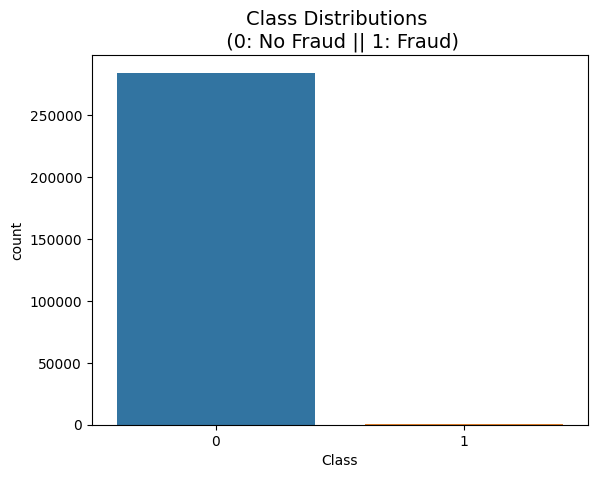

In [6]:
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [7]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))


In [9]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
from sklearn.model_selection import StratifiedKFold
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

print('Train:', original_Xtrain.shape, 'Test:', original_Xtest.shape)


Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
Train: (227846, 30) Test: (56961, 30)


In [12]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print('Train:', train_counts_label/len(original_ytrain))
print('Test:', test_counts_label/len(original_ytest))


Label Distributions: 

Train: [0.99827076 0.00172924]
Test: [0.99827952 0.00172048]


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

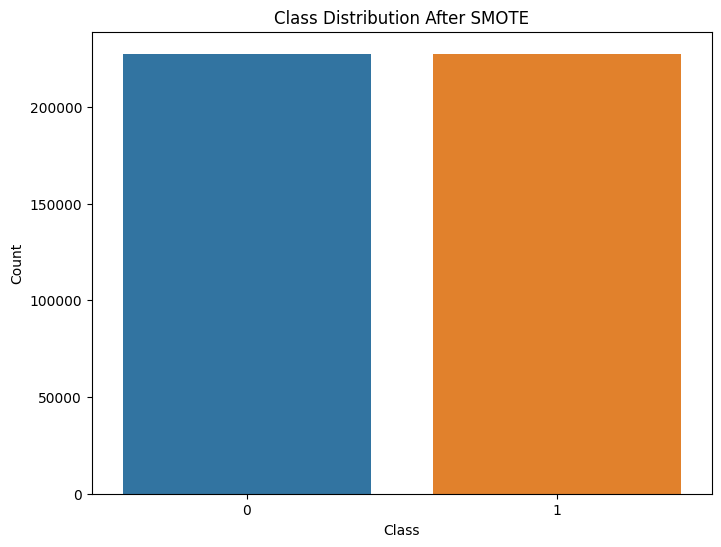

In [14]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(original_Xtrain, original_ytrain)

# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_res)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train logistic regression model on SMOTE data
logreg_smote = LogisticRegression()
logreg_smote.fit(X_res, y_res)
logreg_smote_predictions = logreg_smote.predict(original_Xtest)
logreg_smote_report = classification_report(original_ytest, logreg_smote_predictions, output_dict=True)
print('Logistic Regression (SMOTE):\n', logreg_smote_report)


Logistic Regression (SMOTE):
 {'0': {'precision': 0.9997687943514681, 'recall': 0.9885866028876422, 'f1-score': 0.9941462551949775, 'support': 56863}, '1': {'precision': 0.11580381471389646, 'recall': 0.8673469387755102, 'f1-score': 0.20432692307692307, 'support': 98}, 'accuracy': 0.9883780130264567, 'macro avg': {'precision': 0.5577863045326823, 'recall': 0.9279667708315762, 'f1-score': 0.5992365891359502, 'support': 56961}, 'weighted avg': {'precision': 0.998247954338047, 'recall': 0.9883780130264567, 'f1-score': 0.9927873904533548, 'support': 56961}}


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree model on SMOTE data
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_res, y_res)
dt_smote_predictions = dt_smote.predict(original_Xtest)
dt_smote_report = classification_report(original_ytest, dt_smote_predictions, output_dict=True)
print('Decision Tree (SMOTE):\n', dt_smote_report)


Decision Tree (SMOTE):
 {'0': {'precision': 0.9982777104093074, 'recall': 0.998944832316269, 'f1-score': 0.9986111599451496, 'support': 56863}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 98}, 'accuracy': 0.9972261722933236, 'macro avg': {'precision': 0.4991388552046537, 'recall': 0.4994724161581345, 'f1-score': 0.4993055799725748, 'support': 56961}, 'weighted avg': {'precision': 0.9965601981532004, 'recall': 0.9972261722933236, 'f1-score': 0.9968930739973147, 'support': 56961}}


In [27]:
import xgboost as xgb

# Train XGBoost model on SMOTE data
xgb_smote = xgb.XGBClassifier(random_state=42)
xgb_smote.fit(X_res, y_res)
xgb_smote_predictions = xgb_smote.predict(original_Xtest)
xgb_smote_report = classification_report(original_ytest, xgb_smote_predictions, output_dict=True)
print('XGBoost (SMOTE):\n', xgb_smote_report)


XGBoost (SMOTE):
 {'0': {'precision': 0.9994902443311654, 'recall': 0.9999648277438756, 'f1-score': 0.9997274797148207, 'support': 56863}, '1': {'precision': 0.971830985915493, 'recall': 0.7040816326530612, 'f1-score': 0.8165680473372781, 'support': 98}, 'accuracy': 0.9994557679816014, 'macro avg': {'precision': 0.9856606151233291, 'recall': 0.8520232301984685, 'f1-score': 0.9081477635260493, 'support': 56961}, 'weighted avg': {'precision': 0.9994426572571194, 'recall': 0.9994557679816014, 'f1-score': 0.9994123584147557, 'support': 56961}}


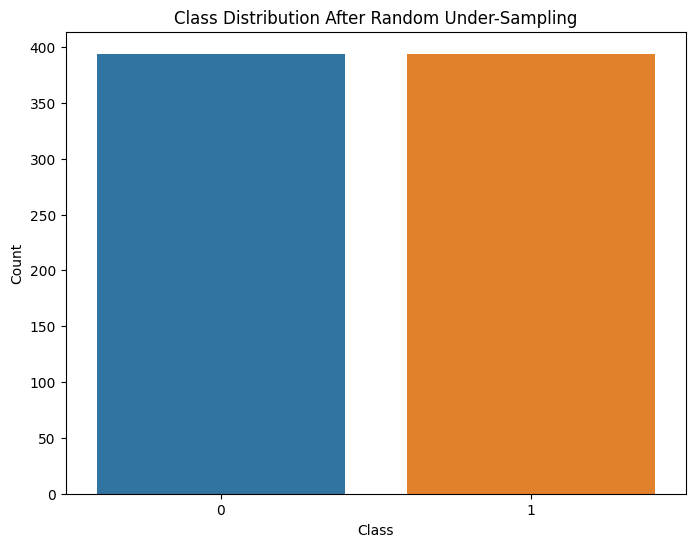

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_res_rus, y_res_rus = rus.fit_resample(original_Xtrain, original_ytrain)

# Visualize the class distribution after Random Under-Sampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_res_rus)
plt.title('Class Distribution After Random Under-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [28]:
# Train logistic regression model on Random Under-Sampled data
logreg_rus = LogisticRegression()
logreg_rus.fit(X_res_rus, y_res_rus)
logreg_rus_predictions = logreg_rus.predict(original_Xtest)
logreg_rus_report = classification_report(original_ytest, logreg_rus_predictions, output_dict=True)
print('Logistic Regression (RUS):\n', logreg_rus_report)


Logistic Regression (RUS):
 {'0': {'precision': 0.9997852963804548, 'recall': 0.9826952499868103, 'f1-score': 0.9911666104971886, 'support': 56863}, '1': {'precision': 0.08037383177570094, 'recall': 0.8775510204081632, 'f1-score': 0.14726027397260275, 'support': 98}, 'accuracy': 0.9825143519250014, 'macro avg': {'precision': 0.5400795640780779, 'recall': 0.9301231351974868, 'f1-score': 0.5692134422348957, 'support': 56961}, 'weighted avg': {'precision': 0.9982034715611702, 'recall': 0.9825143519250014, 'f1-score': 0.9897146903943216, 'support': 56961}}


In [29]:
# Train decision tree model on Random Under-Sampled data
dt_rus = DecisionTreeClassifier()
dt_rus.fit(X_res_rus, y_res_rus)
dt_rus_predictions = dt_rus.predict(original_Xtest)
dt_rus_report = classification_report(original_ytest, dt_rus_predictions, output_dict=True)
print('Decision Tree (RUS):\n', dt_rus_report)


Decision Tree (RUS):
 {'0': {'precision': 0.9982955290415628, 'recall': 0.9373054534583121, 'f1-score': 0.9668396038167109, 'support': 56863}, '1': {'precision': 0.001959686450167973, 'recall': 0.07142857142857142, 'f1-score': 0.0038147138964577656, 'support': 98}, 'accuracy': 0.9358157335720931, 'macro avg': {'precision': 0.5001276077458654, 'recall': 0.5043670124434417, 'f1-score': 0.4853271588565843, 'support': 56961}, 'weighted avg': {'precision': 0.9965813577212919, 'recall': 0.9358157335720931, 'f1-score': 0.9651827431714942, 'support': 56961}}


In [30]:
# Train Random Forest model on Random Under-Sampled data
rf_rus = RandomForestClassifier(random_state=42)
rf_rus.fit(X_res_rus, y_res_rus)
rf_rus_predictions = rf_rus.predict(original_Xtest)
rf_rus_report = classification_report(original_ytest, rf_rus_predictions, output_dict=True)
print('Random Forest (RUS):\n', rf_rus_report)


Random Forest (RUS):
 {'0': {'precision': 0.9997849809170564, 'recall': 0.9812531874857112, 'f1-score': 0.9904324055666004, 'support': 56863}, '1': {'precision': 0.07465277777777778, 'recall': 0.8775510204081632, 'f1-score': 0.1376, 'support': 98}, 'accuracy': 0.9810747704569793, 'macro avg': {'precision': 0.5372188793474171, 'recall': 0.9294021039469372, 'f1-score': 0.5640162027833002, 'support': 56961}, 'weighted avg': {'precision': 0.998193313707779, 'recall': 0.9810747704569793, 'f1-score': 0.9889651283814118, 'support': 56961}}


In [31]:
# Train XGBoost model on Random Under-Sampled data
xgb_rus = xgb.XGBClassifier(random_state=42)
xgb_rus.fit(X_res_rus, y_res_rus)
xgb_rus_predictions = xgb_rus.predict(original_Xtest)
xgb_rus_report = classification_report(original_ytest, xgb_rus_predictions, output_dict=True)
print('XGBoost (RUS):\n', xgb_rus_report)


XGBoost (RUS):
 {'0': {'precision': 0.9997680683663093, 'recall': 0.9854914443486977, 'f1-score': 0.9925784225162513, 'support': 56863}, '1': {'precision': 0.09340659340659341, 'recall': 0.8673469387755102, 'f1-score': 0.16865079365079366, 'support': 98}, 'accuracy': 0.9852881796316778, 'macro avg': {'precision': 0.5465873308864513, 'recall': 0.926419191562104, 'f1-score': 0.5806146080835225, 'support': 56961}, 'weighted avg': {'precision': 0.9982086957333489, 'recall': 0.9852881796316778, 'f1-score': 0.9911608752886955, 'support': 56961}}


In [32]:
# Train SVM model on Random Under-Sampled data
svm_rus = SVC(random_state=42)
svm_rus.fit(X_res_rus, y_res_rus)
svm_rus_predictions = svm_rus.predict(original_Xtest)
svm_rus_report = classification_report(original_ytest, svm_rus_predictions, output_dict=True)
print('SVM (RUS):\n', svm_rus_report)


SVM (RUS):
 {'0': {'precision': 0.9997501918169976, 'recall': 0.9853331691961381, 'f1-score': 0.992489327405098, 'support': 56863}, '1': {'precision': 0.0915032679738562, 'recall': 0.8571428571428571, 'f1-score': 0.1653543307086614, 'support': 98}, 'accuracy': 0.9851126209160653, 'macro avg': {'precision': 0.5456267298954269, 'recall': 0.9212380131694976, 'f1-score': 0.5789218290568797, 'support': 56961}, 'weighted avg': {'precision': 0.998187575315591, 'recall': 0.9851126209160653, 'f1-score': 0.9910662619800484, 'support': 56961}}


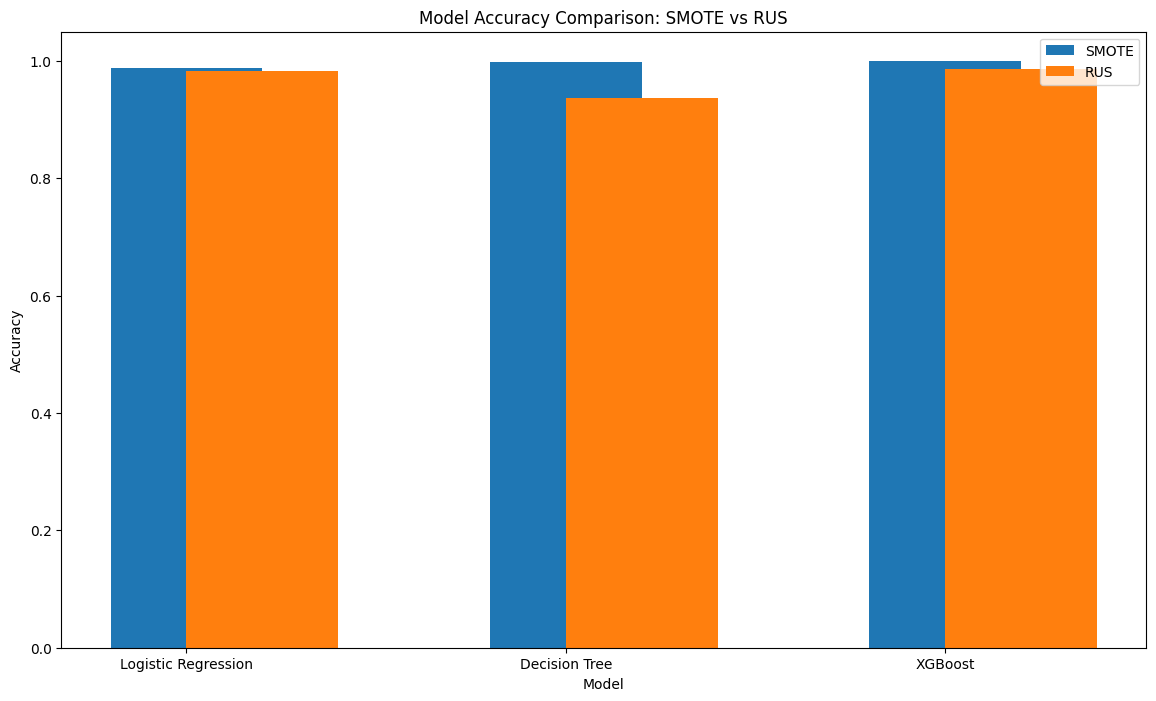

In [34]:
# Collecting the results
results = {
    'Logistic Regression (SMOTE)': logreg_smote_report,
    'Decision Tree (SMOTE)': dt_smote_report,
    'XGBoost (SMOTE)': xgb_smote_report,
    'Logistic Regression (RUS)': logreg_rus_report,
    'Decision Tree (RUS)': dt_rus_report,
    'XGBoost (RUS)': xgb_rus_report,
   
}

# Visualizing the comparison of model accuracy
labels = ['Logistic Regression', 'Decision Tree', 'XGBoost']
smote_scores = [logreg_smote_report, dt_smote_report, xgb_smote_report]
rus_scores = [logreg_rus_report, dt_rus_report, xgb_rus_report]

x = range(len(labels))
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(x, [r['accuracy'] for r in smote_scores], width=0.4, label='SMOTE', align='center')
ax.bar(x, [r['accuracy'] for r in rus_scores], width=0.4, label='RUS', align='edge')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison: SMOTE vs RUS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
